In [1]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import nltk
from tqdm import tqdm
plt.style.use('fivethirtyeight')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from autocorrect import Speller
spell=Speller()
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

c:\users\thero\anaconda3\envs\tensorflow2_env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\thero\anaconda3\envs\tensorflow2_env\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\thero\anaconda3\envs\tensorflow2_env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df=pd.read_csv(r'D:\Python37\Projects\Twitter Sentiment  Data - TMLC\Twitter_Data.csv')

In [3]:
df.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [4]:
df.shape

(162980, 2)

In [5]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

### cleaning null values

In [6]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [7]:
df[df['category'].isnull()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [8]:
df[df['clean_text'].isnull()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [9]:
df.drop(df[df['clean_text'].isnull()].index, inplace=True)
df.drop(df[df['category'].isnull()].index, inplace=True)

In [10]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

## make a function to clean tweets


In [11]:
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text) # removing Retweets
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [12]:
df['clean_text']= df['clean_text'].apply(cleanTxt)

In [13]:
df['clean_text'][0]

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

# Lets find out the sentiments and Lets do some Analysis

In [14]:
analysis=TextBlob("rich")

In [15]:
analysis.sentiment

Sentiment(polarity=0.375, subjectivity=0.75)

In [16]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['clean_text'].apply(getSubjectivity)
df['Polarity']= df['clean_text'].apply(getPolarity)

In [17]:
df.head(5)

,clean_text,category,Subjectivity,Polarity
0,when modi promised “minimum government maximum...,-1.0,0.700000,-0.300000
1,talk all the nonsense and continue all the dra...,0.0,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,1.0,0.616667,0.483333
3,asking his supporters prefix chowkidar their n...,1.0,0.658333,0.150000
4,answer who among these the most powerful world...,1.0,0.750000,0.400000


### Lets do Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

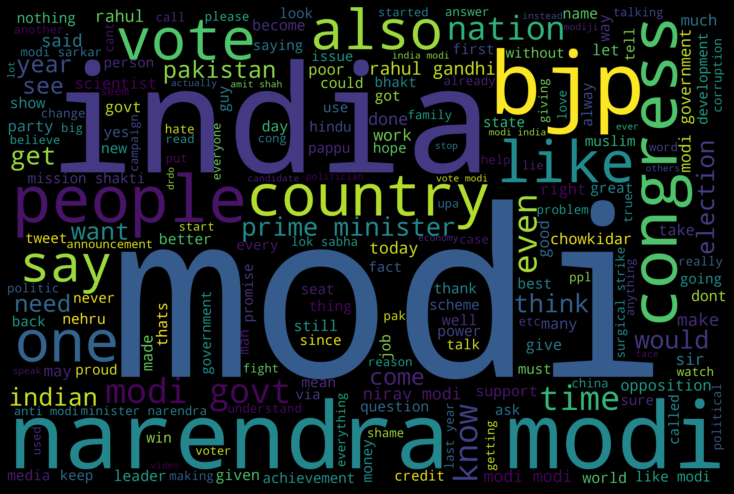

In [18]:
# Word Cloud Visualization  
# whole dataset
allwords= ' '.join([i for i in df['clean_text']])

wordcloud = WordCloud(
width=3000, height=2000, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(allwords)

fig = plt.figure(figsize=(10,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

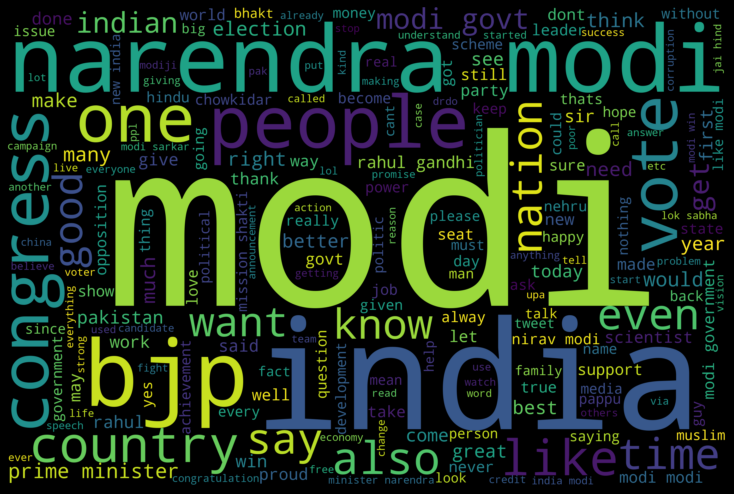

In [19]:
# positive tweets

text = ''

for tweet in df[df['category'] == 1.0]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=3000, height=2000, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(10,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show



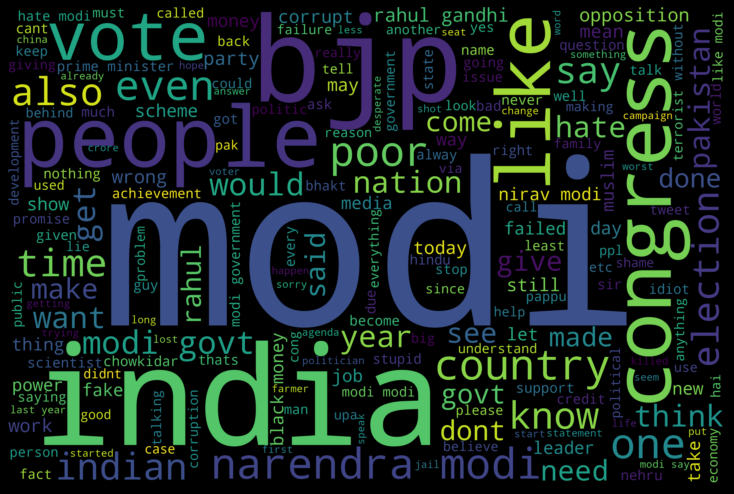

In [20]:
# negative tweets

text = ''

for tweet in df[df['category'] == -1.0 ]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=3000, height=2000, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(10,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

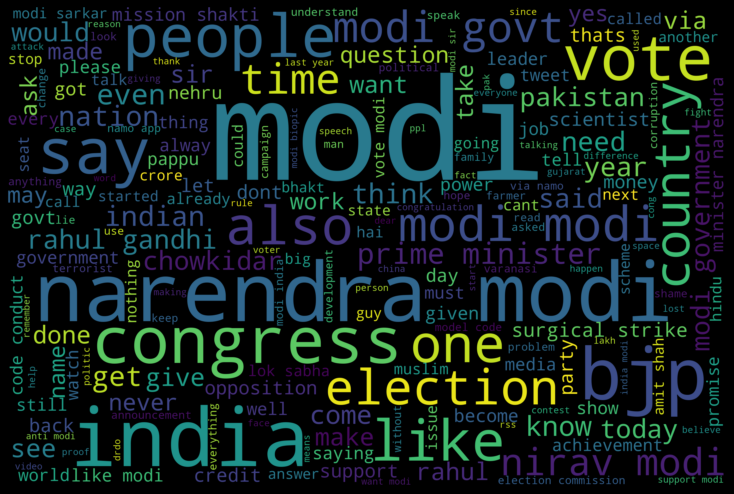

In [21]:
# neutral tweets

text = ''

for tweet in df[df['category'] == 0.0 ]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=3000, height=2000, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(10,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text


### Create a function to compute negative neutral and positive and form new column

In [22]:

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df.head()

,clean_text,category,Subjectivity,Polarity,Analysis
0,when modi promised “minimum government maximum...,-1.0,0.700000,-0.300000,Negative
1,talk all the nonsense and continue all the dra...,0.0,0.000000,0.000000,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,0.616667,0.483333,Positive
3,asking his supporters prefix chowkidar their n...,1.0,0.658333,0.150000,Positive
4,answer who among these the most powerful world...,1.0,0.750000,0.400000,Positive


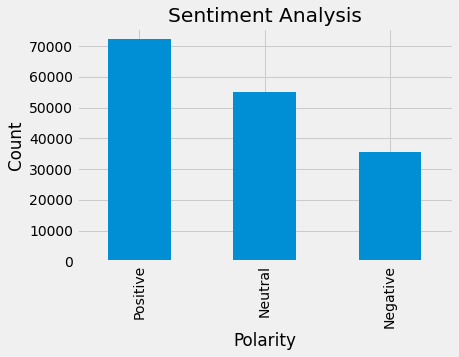

In [23]:
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [24]:
# Lets get positive tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Positive'):
        print(str(i)+ ') ' + sortedDF['clean_text'][j])
        print()
        i=i+1

1) what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax

2) asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars

3) answer who among these the most powerful world leader today trump putin modi may 

4) with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho 

5) gandhi was gay does modi  

6) things like demonetisation gst goods and services tax…the upper castes would sort either view favourably say that need give this more time other castes like dalits the muslims were more against because that’ just not modi’ constituency2

7) hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi 

8) calm

KeyError: 148

In [25]:
# Lets get negative tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Negative'):
        print(str(i)+ ') ' + sortedDF['clean_text'][j])
        print()
        i=i+1

1) when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

2) vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party 

3) didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti 

4) with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today 

5) sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh

6) thiugh nehru not alive but still alive heart modi for every failure nehru responsible 

7) modi govts slashing indias education budget clear indicator that they dont care for indias fut

KeyError: 148

In [27]:
# Lets get neutral tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][j]=='Neutral'):
        print(str(i)+ ') ' + sortedDF['clean_text'][j])
        print()
        i=i+1

1) talk all the nonsense and continue all the drama will vote for modi 

2) kiya tho refresh maarkefir comment karo 

3) surat women perform yagna seeks divine grace for narendra modi become again


4) this comes from cabinet which has scholars like modi smriti and hema time introspect

5) one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his vote kar campaign 

6) one vote can make all the difference anil kapoor answers modis election 2019 clarion call extends support his campaign 

7) vote modi who has not created jobs

8) through our vote ensure govt need and deserve anupam kher responds modis appeal for the 2019 elections 

9) crush jaws those who shoutmodimodi says jds mla this inciting murder

10) has already taken notice and ordered probe now time for modi take notice muslim family being harassed beaten recently extremist hindus and was suggested leave india move pakistan

11) was waiting for this modi will also talk about 

KeyError: 148

## Analysis is over --------------------------------------------------------------------------------------------

# Feature Extraction

In [73]:
#Split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=7)

In [81]:
#Initialize a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7,max_features=10000)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [82]:
dic_vocabulary = tfidf_vectorizer.vocabulary_
dic_vocabulary

{'legacy': 5337,
 'prob': 7060,
 'created': 2306,
 'bjp': 1266,
 'scheme': 8004,
 'started': 8587,
 'proved': 7165,
 'burden': 1495,
 'exchequer': 3328,
 'subsidies': 8721,
 'given': 3932,
 'congis': 2104,
 'certainly': 1665,
 'delivery': 2588,
 'corrupt': 2241,
 'rajiv': 7324,
 'said': 7887,
 'reached': 7396,
 'effective': 3096,
 'jam': 4890,
 'dbt': 2479,
 'bhakts': 1204,
 'claimed': 1865,
 'credited': 2320,
 'inr': 4681,
 '7200000': 190,
 '280319': 129,
 'deposit': 2639,
 'transfer': 9228,
 'indian': 4603,
 'national': 6154,
 'congress': 2113,
 'bal': 988,
 '157200000': 44,
 'lakh': 5248,
 'wale': 9699,
 'hain': 4126,
 'high': 4286,
 'time': 9134,
 'abhinandan': 236,
 'spoke': 8529,
 'told': 9158,
 'truth': 9307,
 'says': 7982,
 'sounds': 8467,
 'like': 5400,
 'false': 3469,
 'poorest': 6876,
 'poor': 6874,
 'indians': 4604,
 'effected': 3095,
 'demonetization': 2608,
 'thing': 9067,
 'remember': 7547,
 'decades': 2503,
 'government': 3993,
 'people': 6678,
 'pushed': 7227,
 'povert

# Model Training

In [31]:
#Initialize a PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [32]:
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.77%


# Test on a single data

In [88]:
text= 'Modi is a ok man'  # replace ok with good and bad you will see results accordingly

In [89]:
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text) # removing Retweets
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

text=cleanTxt(text)
tfidf=tfidf_vectorizer.transform([text])
print(pac.predict(tfidf))

[0.]
